# load data & library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
train = pd.read_csv("../data/MiniP3/train.csv", index_col="index")
print(train.shape)
train.head()

(5497, 13)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [6]:
test = pd.read_csv("../data/MiniP3/test.csv", index_col="index")
print(test.shape)
test.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


# 데이터 타입과 결측치 조회

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [8]:
train.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [9]:
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

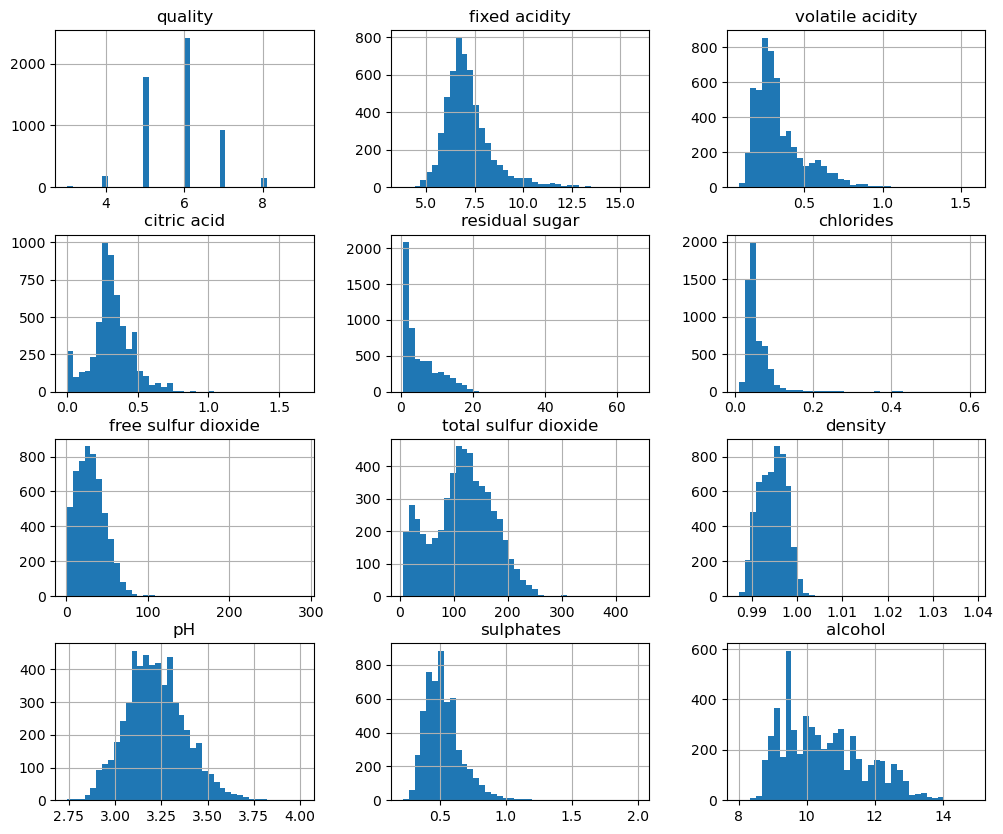

In [12]:
train.hist(figsize=(12, 10), bins=40);

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [45]:
X_train = np.array([1, 2, 3])
y_train = np.array([10, 20, 30])

X_test = np.array([2, 3, 1])

In [39]:
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
X_train = X_train.reshape((-1, 1))
X_train

array([[1],
       [2],
       [3]])

In [41]:
# y_train = y_train.reshape((-1, 1))
# y_train

array([[10],
       [20],
       [30]])

In [48]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
X_test = X_test.reshape((-1, 1))
X_test

array([[2],
       [3],
       [1]])

In [52]:
model.predict_proba(X_test)

array([[0.31, 0.66, 0.03],
       [0.03, 0.27, 0.7 ],
       [0.75, 0.22, 0.03]])

In [70]:
answer = np.array([2, 3, 1])
probability = model.predict_proba(X_test)

In [71]:
from sklearn.metrics import log_loss

sklearn_log_loss = log_loss(answer, probability)
sklearn_log_loss

0.353290820117393

In [73]:
res = 0
for ans, l in zip(answer, probability):
    temp = -np.log(l[ans - 1])
    print(ans, l)
    res += temp
    print(temp)
    print()
res / len(answer)

2 [0.31 0.66 0.03]
0.4155154439616658

3 [0.03 0.27 0.7 ]
0.35667494393873245

1 [0.75 0.22 0.03]
0.2876820724517809



0.353290820117393

In [67]:
-np.log(0.9)

0.10536051565782628

In [68]:
-np.log(0.34)

1.0788096613719298